In [12]:
# Import the required libraries and dependencies
import pandas as pd
from prophet import Prophet
import datetime as dt
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [13]:
df= pd.read_excel("ev.charge.xlsx")

In [14]:
df.head()

,sessionId,kwhTotal,dollars,created,ended,startTime,endTime,chargeTimeHrs,weekday,platform,...,managerVehicle,facilityType,Mon,Tues,Wed,Thurs,Fri,Sat,Sun,reportedZip
0,1366563,7.78,0.00,0014-11-18 15:40:26,0014-11-18 17:11:04,15,17,1.510556,Tue,android,...,0,3,0,1,0,0,0,0,0,0
1,3075723,9.74,0.00,0014-11-19 17:40:26,0014-11-19 19:51:04,17,19,2.177222,Wed,android,...,0,3,0,0,1,0,0,0,0,0
2,4228788,6.76,0.58,0014-11-21 12:05:46,0014-11-21 16:46:04,12,16,4.671667,Fri,android,...,0,3,0,0,0,0,1,0,0,0
3,3173284,6.17,0.00,0014-12-03 19:16:12,0014-12-03 21:02:18,19,21,1.768333,Wed,android,...,0,3,0,0,1,0,0,0,0,0
4,3266500,0.93,0.00,0014-12-11 20:56:11,0014-12-11 21:14:06,20,21,0.298611,Thu,android,...,0,3,0,0,0,1,0,0,0,0


In [15]:
df.dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3394 entries, 0 to 3393
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sessionId       3394 non-null   int64  
 1   kwhTotal        3394 non-null   float64
 2   dollars         3394 non-null   float64
 3   created         3394 non-null   object 
 4   ended           3394 non-null   object 
 5   startTime       3394 non-null   int64  
 6   endTime         3394 non-null   int64  
 7   chargeTimeHrs   3394 non-null   float64
 8   weekday         3394 non-null   object 
 9   platform        3394 non-null   object 
 10  distance        2330 non-null   float64
 11  userId          3394 non-null   int64  
 12  stationId       3394 non-null   int64  
 13  locationId      3394 non-null   int64  
 14  managerVehicle  3394 non-null   int64  
 15  facilityType    3394 non-null   int64  
 16  Mon             3394 non-null   int64  
 17  Tues            3394 non-null   i

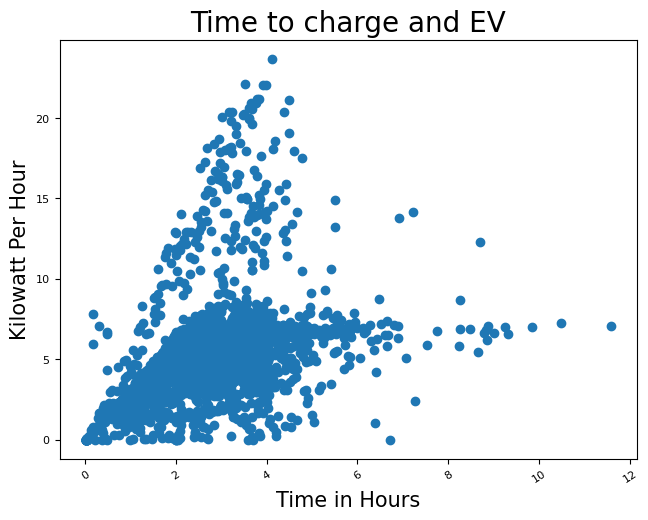

In [17]:
plt.scatter(df['chargeTimeHrs'], df['kwhTotal'])
plt.xticks(rotation=33)
plt.tight_layout()
plt.title("Time to charge and EV", fontsize=20)
plt.xlabel("Time in Hours", fontsize=15)
plt.ylabel("Kilowatt Per Hour", fontsize=15)
plt.tick_params(axis = 'both', which = 'major', labelsize=8)
plt.show()

In [18]:
df['chargeTimeHrs'].mean()

2.8260496464307603

In [19]:
df['kwhTotal'].mean()

5.8101325869180895

In [34]:
df2= pd.read_excel("Cost of KWH.xlsx")

In [35]:
df2.head()

,State,KWH,Unnamed: 2,MOVEMENT,CHANGE (%)
0,Alabama,12.41¢ / kWh,12.79¢ / kWh,DOWN,-0.02971
1,Alaska,22.54¢ / kWh,22.14¢ / kWh,UP,0.01806
2,Arizona,13.16¢ / kWh,12.65¢ / kWh,UP,0.04031
3,Arkansas,9.99¢ / kWh,10.73¢ / kWh,DOWN,-0.06896
4,California,19.90¢ / kWh,19.39¢ / kWh,UP,0.02630


In [36]:
df2['KWH'].mean()

TypeError: Could not convert 12.41¢ / kWh22.54¢ / kWh13.16¢ / kWh9.99¢ / kWh19.90¢ / kWh12.28¢ / kWh21.62¢ / kWh13.21¢ / kWh12.05¢ / kWh11.37¢ / kWh12.26¢ / kWh32.76¢ / kWh10.58¢ / kWh12.56¢ / kWh12.02¢ / kWh13.81¢ / kWh11.56¢ / kWh10.56¢ / kWh9.37¢ / kWh16.16¢ / kWh13.92¢ / kWh21.11¢ / kWh16.07¢ / kWh14.09¢ / kWh11.55¢ / kWh13.23¢ / kWh11.85¢ / kWh11.31¢ / kWh11.67¢ / kWh19.63¢ / kWh15.64¢ / kWh13.37¢ / kWh19.30¢ / kWh11.24¢ / kWh12.07¢ / kWh12.64¢ / kWh10.72¢ / kWh11.02¢ / kWh14.38¢ / kWh18.64¢ / kWh12.91¢ / kWh12.39¢ / kWh10.79¢ / kWh11.36¢ / kWh10.63¢ / kWh18.50¢ / kWh12.40¢ / kWh9.79¢ / kWh11.57¢ / kWh14.28¢ / kWh12.30¢ / kWh to numeric